In [18]:
print('Meu nome é: Gabriel Moraes Barros ')
print('Meu RA é: 192801')

Meu nome é: Gabriel Moraes Barros 
Meu RA é: 192801


# Implementar o batch gradient descent

Desenvolva aqui o seu código para realizar o *batch gradient descent* a partir dos códigos [Gradiente Descendente por Lote](#gdl) (batch) e [Gradiente Descendente Estocástico](#gde), que fazem parte do notebook <a "href=https://t-adessowiki.fee.unicamp.br/user/lrittner/notebooks/ia368z_2s2017/aluno/week03/Regressao-Linear.ipynb">Regressao-Linear.ipynb</a>. A ideia é que o tamanho do lote possa assumir qualquer valor entre 1 e o número total de amostras. 

## Entrega do exercício

A entrega do exercício consiste do notebook com o seu código e a [figura salva conforme código abaixo](#figura). A figura deve ser composta por 3 plotagens do erro ao longo das iterações considerando um tam_lote = 1, tam_lote = T e tam_lote = num_amostras. Escolha T de tal forma que num_amostras/T não seja inteiro.

**Não altere o nome do notebook, o nome da figura salva, nem as dimensões da figura e o arranjo do subplot, pois estes parâmetros são necessários para facilitar a correção.**

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [20]:
iris = load_iris()
print(type(iris))
print('iris.data:',iris.data.shape,iris.data.dtype,iris.data.min(),iris.data.max())
print('iris.target:',iris.target.shape,iris.target.dtype,iris.target.min(),iris.target.max())
#print(iris.DESCR)
print('iris.features_name:',iris.feature_names)
print('iris.target_names:',iris.target_names)

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['target'] = iris.target
iris_pd


<class 'sklearn.datasets.base.Bunch'>
iris.data: (150, 4) float64 0.1 7.9
iris.target: (150,) int64 0 2
iris.features_name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [21]:
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x = data[:,0:1]
y = data[:,1:2]

print('x.shape:',x.shape, x.dtype)
print('y.shape:',y.shape, y.dtype)

print('x[:5]:\n', x[:5])
print('y[:5]:\n', y[:5])

x.shape: (50, 1) float64
y.shape: (50, 1) float64
x[:5]:
 [[ 7. ]
 [ 6.4]
 [ 6.9]
 [ 5.5]
 [ 6.5]]
y[:5]:
 [[ 4.7]
 [ 4.5]
 [ 4.9]
 [ 4. ]
 [ 4.6]]


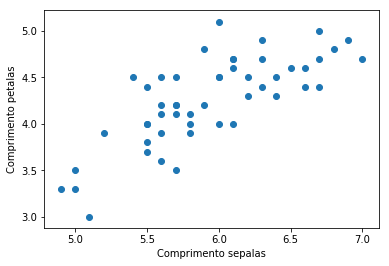

In [22]:
plt.scatter(x, y)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')
plt.show()

In [23]:
x -= x.min()
x /= x.max()    # normalização
y -= y.min()
y /= y.max()


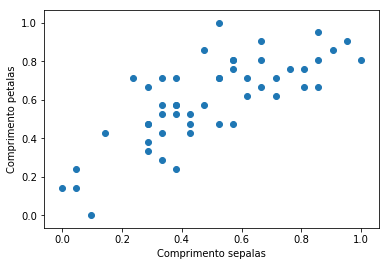

In [24]:
plt.scatter(x, y)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')
plt.show()

In [25]:
def compute_cost(X_b, y, wT):
    '''
    Compute cost for linear regression
    (X,y): amostras rotuladas X(n_samples,2) e y(n_samples,)
    wT: vetor coluna de parâmetros (já transposto)
       aceita tanto shape (2,1) Para um caso como (2,n_history) para n_history casos
    '''
    e = X_b.dot(wT) - y
    J = (e * e).mean(axis=0)
    return J

In [26]:
def batch_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform batch gradient descent to learn w
    by taking n_epochs gradient steps with learning
    rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,n_epochs+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        wT = wT - lr * (2.0 / M) * (X.T).dot(X.dot(wT) - y)
        w_history[:,i+1]=wT[:,0]
    return w_history.T

In [37]:
def stochastic_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform stochastic gradient descent to learn w
    by taking n_epochs times number of samples 
    gradient steps with learning rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,(M*n_epochs)+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        for jj in range(M):
            j = np.random.randint(M)
            wT = wT - lr * 2.0 * (X[j:j+1,:].T).dot(X[j:j+1,:].dot(wT) - y[j:j+1])
            w_history[:,jj+(i*M)+1] = wT[:,0]
    return w_history.T

In [45]:

def getbatches(X, Y, limit, batchsize):
    '''
    Input parameters:
    X,Y = Shuffled dataset as numpay matrix
    Output = several batches choosen randomly
    batchx,batchy = shape(batchsize,:)
    '''
    indeces = np.random.randint(limit, size=limit)
    for j in indeces:
        batch_x = X[j:j+batchsize,:]
        batch_y = Y[j:j+batchsize]
        yield batch_x, batch_y

def mini_batch_gradient_descent(X, Y, w_init, lr, n_epochs,batchsize):
    '''
    Perform mini-batch  gradient descent
    
    Parameters:
    X = samples
    Y = result
    w_init = initial guess for the weights = w_init.shape:(1,2)
    lr = learning_rate
    n_epochs = number of training epochs
    batchsize = size of the mini-batch
    
    
    Labeled data: X.shape:(M,2) e y.shape:(M,1)
    
    output: w_history:(n_epochs * (X.shape[0] - batchsize + 1))
    '''
    
    M = y.size
    limit = M - batchsize + 1
    w_history = np.zeros((2,(limit*n_epochs)+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]
    
    for i in range(n_epochs):
        #Shuffle the indices array
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        
        #Return an iterable of x and y batches
        batchs = getbatches(X[indices,:], y[indices], limit, batchsize)
        
        j = 0
        for  batch_x, batch_y in batchs:
            #Apply the gradient descent for each batch
            wT = wT - lr * (2.0 / batchsize) * (batch_x.T).dot(batch_x.dot(wT) - batch_y)
            #Guarantees that the w_history is being written in the right places
            w_history[:,j+(i*limit)+1] = wT[:,0]
            j = j + 1
    return w_history.T

In [46]:
import time
# Parâmetros do gradiente descendente: número de iterações e taxa de aprendizagem
iterations = 100
lr = 0.1
n_samples = y.shape[0]
X_bias = np.hstack([np.ones(shape=(n_samples,1)), x])
w_init = np.zeros(shape=(1,2))
print(X_bias.shape)

(50, 2)


# Printando Stocasthic

In [47]:
batchsize=1
w_history_stochastic = mini_batch_gradient_descent(X_bias, y, w_init, lr, iterations,batchsize)
J_history_stochastic = compute_cost(X_bias, y, w_history_stochastic.T)
print(J_history_stochastic)

[ 0.40907029  0.19360545  0.08777523 ...,  0.02558297  0.02215636
  0.02134393]


# Printando Mini-Batch

In [48]:
batchsize=11
w_history_mini = mini_batch_gradient_descent(X_bias, y, w_init, lr, iterations,batchsize)
print(w_history_mini.shape)
J_history_mini = compute_cost(X_bias, y, w_history_mini.T)
print(J_history_mini)

(4001, 2)
[ 0.40907029  0.23055254  0.12757417 ...,  0.02132678  0.02122061
  0.02140166]


# Printando Batch Gradient Descent


In [49]:
batchsize = n_samples
w_history_batch = mini_batch_gradient_descent(X_bias, y, w_init, lr, iterations,batchsize)
J_history_batch = compute_cost(X_bias, y, w_history_batch.T)
print(J_history_batch)

[ 0.40907029  0.24348202  0.1505187   0.09829049  0.0689112   0.05234888
  0.04297685  0.03763921  0.03456589  0.03276406  0.03167684  0.03099186
  0.0305339   0.03020466  0.02994897  0.02973587  0.02954796  0.02937547
  0.02921288  0.02905708  0.02890631  0.02875954  0.02861619  0.0284759
  0.02833845  0.0282037   0.02807155  0.02794191  0.02781473  0.02768994
  0.02756751  0.02744738  0.0273295   0.02721384  0.02710036  0.026989
  0.02687973  0.02677252  0.02666732  0.02656409  0.02646281  0.02636342
  0.0262659   0.02617021  0.02607632  0.02598419  0.02589379  0.02580509
  0.02571805  0.02563265  0.02554885  0.02546662  0.02538594  0.02530677
  0.02522909  0.02515287  0.02507808  0.02500469  0.02493268  0.02486203
  0.0247927   0.02472467  0.02465791  0.02459242  0.02452815  0.02446509
  0.02440321  0.02434249  0.02428292  0.02422446  0.0241671   0.02411082
  0.02405559  0.0240014   0.02394823  0.02389606  0.02384486  0.02379463
  0.02374534  0.02369698  0.02364952  0.02360296  0.02

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

### Gerando a figura para correção automática

<a id='figura'></a>

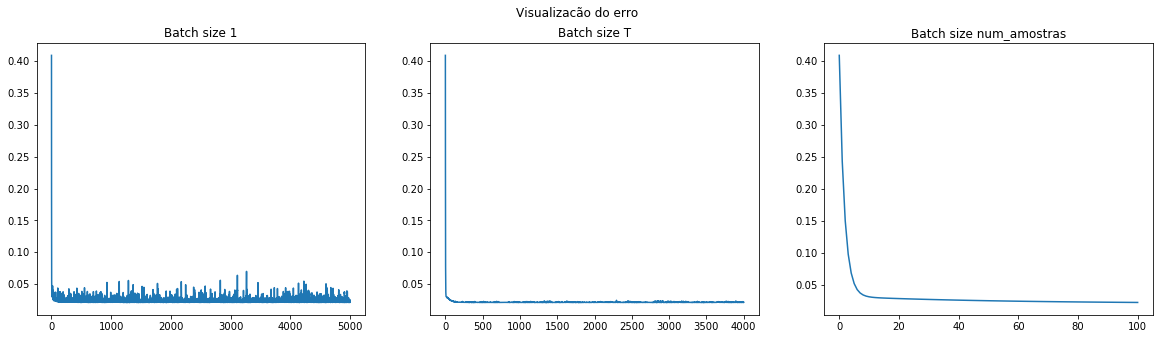

In [52]:
fig = plt.figure(figsize=(20,5))
plt.suptitle('Visualizacão do erro')

ax = fig.add_subplot(131)
plt.title("Batch size 1")
#ax.plot(J_history_stochastic)
ax.plot(J_history_stochastic)

ay = fig.add_subplot(132)
plt.title("Batch size T")
#ay.plot(J_history)
ay.plot(J_history_mini)

az = fig.add_subplot(133)
plt.title("Batch size num_amostras")
#az.plot(J_history)
az.plot(J_history_batch)
plt.savefig('my_sgd_minibatch.png')